In [11]:
import pandas as pd
import numpy as np
import popsims

import matplotlib.pyplot as plt
import glob
from popsims.plot_style import  plot_style
plot_style()
%matplotlib inline


In [2]:
lsdmodels=np.load('/Volumes/LaCie/popsimsdata/subdwarfs_models_{}.npy'.format('line2021'), allow_pickle=True)[0]
rmodels=np.load('/Volumes/LaCie/popsimsdata/subdwarfs_models_{}.npy'.format('gerasimov'), allow_pickle=True)[0]



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [3]:
esd_roman=np.array(rmodels['spectra'])[np.logical_and.reduce([rmodels['teff']==1000,
                                                             rmodels['logg']==5.,
                                                             rmodels['z']==-1.5])][0]

#esd_romanm=np.array(rmodels['spectra'])[np.logical_and.reduce([rmodels['teff']==2000,
#                                                             rmodels['logg']==5.,
#                                                             rmodels['z']==-1.5])][0]

In [4]:
esd_line=np.array(lsdmodels['spectra'])[np.logical_and.reduce([lsdmodels['teff']==1000,
                                                      lsdmodels['logg']==5.0,
                                                      lsdmodels['z']==-1.5])][0]

d_line=np.array(lsdmodels['spectra'])[np.logical_and.reduce([lsdmodels['teff']==1000,
                                                      lsdmodels['logg']==5.0,
                                                      lsdmodels['z']==0.])][0]

In [5]:
esd_roman.smooth(100)
esd_roman.normalize([1.2, 1.3])
esd_line.normalize([1.2, 1.3])
d_line.normalize([1.2, 1.3])

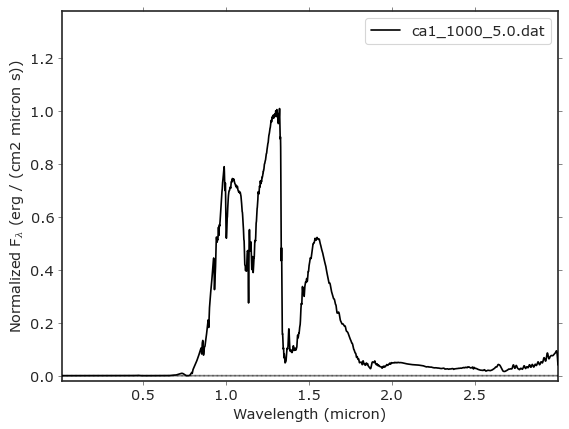

[<Figure size 640x480 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [6]:
esd_roman.plot()

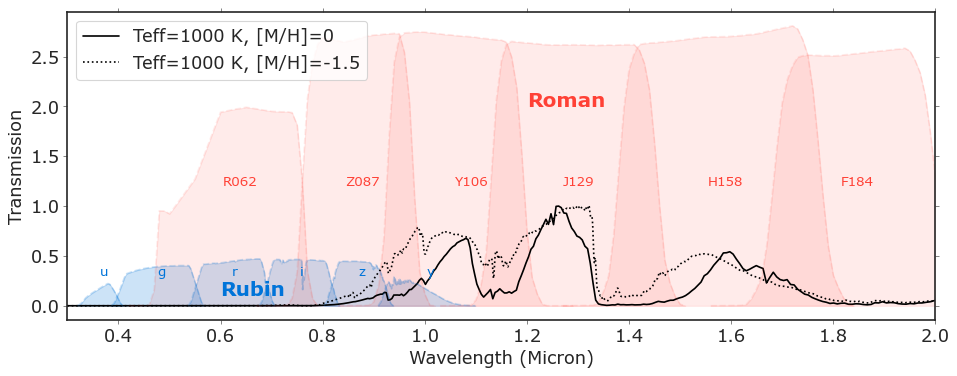

In [21]:
fig, ax=plt.subplots(figsize=(14, 5))
ax.plot(d_line.wave, d_line.flux, c='k', label='Teff=1000 K, [M/H]=0')
ax.plot(esd_roman.wave, esd_roman.flux, c='k', linestyle='dotted', label='Teff=1000 K, [M/H]=-1.5')


for f in glob.glob('/users/caganze/research/splat/resources/filters/*LSST*.dat'):

        d=pd.read_csv(f, names=['LAM', 'TRANSMISSION'], delim_whitespace=True).astype(float)
        d['LAM']= d['LAM']/10_000
        #print (f)
        plt.plot(d.LAM, d.TRANSMISSION, color='#0074D9', linestyle='--', alpha=0.2)
        ax.fill_between(d.LAM, d.TRANSMISSION, color='#0074D9',alpha=0.2)
        
#for f in glob.glob('/users/caganze/research/splat/resources/filters/*NIRISS*.dat'):

#        d=pd.read_csv(f, names=['LAM', 'TRANSMISSION'], delim_whitespace=True).astype(float)
#        d['LAM']= d['LAM']/10_000
#        #print (f)
#        plt.plot(d.LAM, d.TRANSMISSION, color='#7FDBFF', linestyle='--')
        fl=(f.split('/')[-1].split('.dat')[0].split('_')[-1]).split('LSST.')[-1]
        ax.text( np.nanmedian(d.LAM), 0.3, fl,   color='#0074D9',  fontweight='light', fontsize=12)
#BJNKM
        
for f in glob.glob('/users/caganze/research/splat/resources/filters/*WFI*.dat'):
    if 'ism' not in f and 'W146' not in f:

        d=pd.read_csv(f, names=['LAM', 'TRANSMISSION'], delim_whitespace=True).astype(float)
        d['LAM']= d['LAM']/10_000
        #print (f)
        plt.plot(d.LAM, d.TRANSMISSION, color='#FF4136', linestyle='--', alpha=0.1)
        ax.fill_between(d.LAM, d.TRANSMISSION, color='#FF4136',alpha=0.1)
        
        fl=(f.split('/')[-1].split('.dat')[0].split('_')[-1]).split('WFI.')[-1]
        ax.text( np.nanmedian(d.LAM), 1.2, fl,   color='#FF4136',  fontweight='light', fontsize=12)

ax.text(0.6, 0.1, 'Rubin',  color='#0074D9',  fontweight='bold')
ax.text(1.2, 2.0, 'Roman',   color='#FF4136',  fontweight='bold')
        
ax.legend(loc='upper left')
ax.set(xlim=[0.3, 2], ylabel='Transmission', xlabel='Wavelength (Micron)')
plt.savefig('../figures/filter_profiles.pdf', bbox_inches='tight')

In [8]:
f.split('/')[-1].split('.dat')[0].split('_')[-1]

'WFI.Z087'

In [9]:
fl

'Z087'